<a href="https://colab.research.google.com/github/mtello5/IS170_Machine_Learning/blob/Decision-Trees-%26-Random-Forests/Prostate_Cancer_Decision_Tree_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

HW 9 Decision Tree | Prostate Cancer | Matthew Tello

In [ ]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [ ]:
# load dataset
df = pd.read_csv("/content/Prostate_Cancer.csv") 
df.head()

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059


In [ ]:
#  Converting 'diagnosis' column to 1 = Malignant (cancerous), 0 = Benign (non-cancerous)
df['diagnosis_result'] = df['diagnosis_result'].map({'M': 1, 'B': 0})

In [ ]:
#split dataset in features and target variable
x_data=df[['radius','texture','perimeter','area','smoothness','compactness','symmetry','fractal_dimension']]
y_data=df['diagnosis_result']


In [ ]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=1) # 70% training and 30% test


In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7666666666666667


# **Visualizing Decision Trees**

In [ ]:
!pip install graphviz
!pip install pydotplus
!pip install six

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


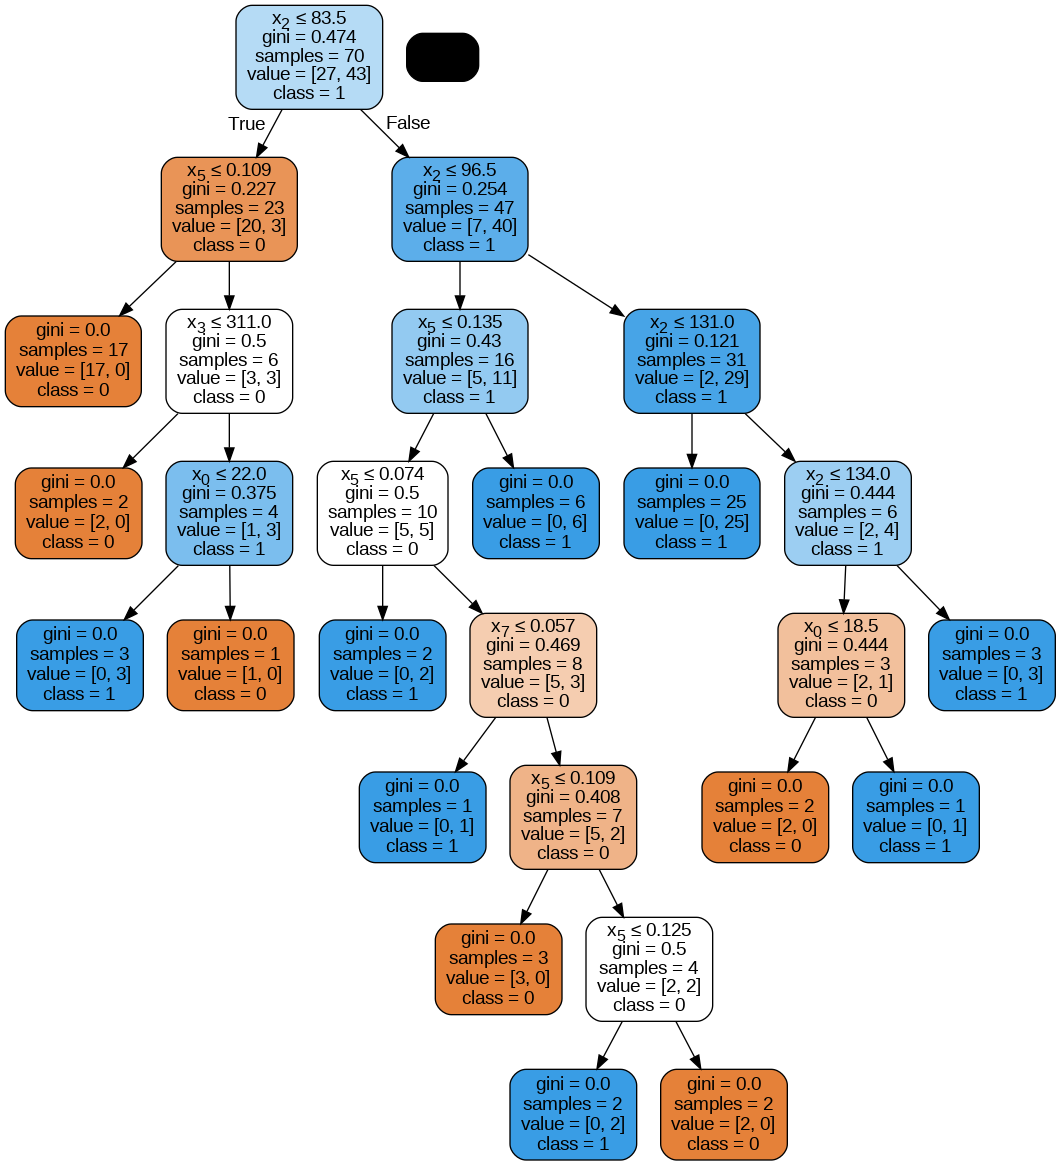

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus


dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('prostate.png')
Image(graph.create_png())

Using this model and this Prostate Cancer dataset, we found that using the independent variables "radius", "texture", "perimeter", "area", "smoothness", "compactness", "symmetry", and "fractal_dimension", we can figure out with about 76.67% accuracy if the prostate cancer is Malignant or Benign.